In [17]:
# Data manipulation
import numpy as np
import pandas as pd
import glob

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Excel reading (if needed)
import xlrd  # for older .xls files
# import openpyxl  # for modern .xlsx files

# HTTP requests and web scraping
import requests
from bs4 import BeautifulSoup

# Warnings'
import warnings
warnings.filterwarnings('ignore')  # optional: to ignore warnings

In [18]:
df = pd.read_csv("/Users/Goldie/Desktop/Ironhack/Project/IronHack-w3-Modual1-Project3/Data/Clean/CLEAN DATA GROUP B.csv")


In [19]:
#df["Position"].value_counts()
#df[df["Position"] == "Centre Back"]
#df.info()
df[["Position", "Height"]].info()

<class 'pandas.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Position  3684 non-null   str  
 1   Height    3684 non-null   int64
dtypes: int64(1), str(1)
memory usage: 57.7 KB


In [20]:
# Filter out unwanted positions
positions_to_exclude = ["Substitute", "Reserve", "Unknown" ]
df_filtered = df[~df["Position"].isin(positions_to_exclude)]

In [21]:
avg_height = (
df_filtered.groupby("Position")["Height"]
.mean()
.sort_values(ascending=False)
)


avg_height

Position
Goalkeeper                   190.246835
Centre Back                  188.696970
Left Centre Back             187.650000
Right Centre Back            187.032895
Right Forward                183.545455
Striker                      183.493243
Centre Defensive Midfield    181.945946
Left Striker                 181.758065
Right Striker                181.649123
Left Defensive Midfield      180.325000
Right Defensive Midfield     180.240000
Right Centre Midfield        179.992537
Left Centre Midfield         179.674603
Right Wing Back              178.718750
Left Back                    178.543103
Left Forward                 178.400000
Left Wing Back               178.076923
Right Back                   178.009346
Right Midfield               177.850000
Right Wing                   177.049180
Left Midfield                177.000000
Left Wing                    176.952381
Centre Attacking Midfield    176.337349
LAM                          176.333333
Centre Forward               17

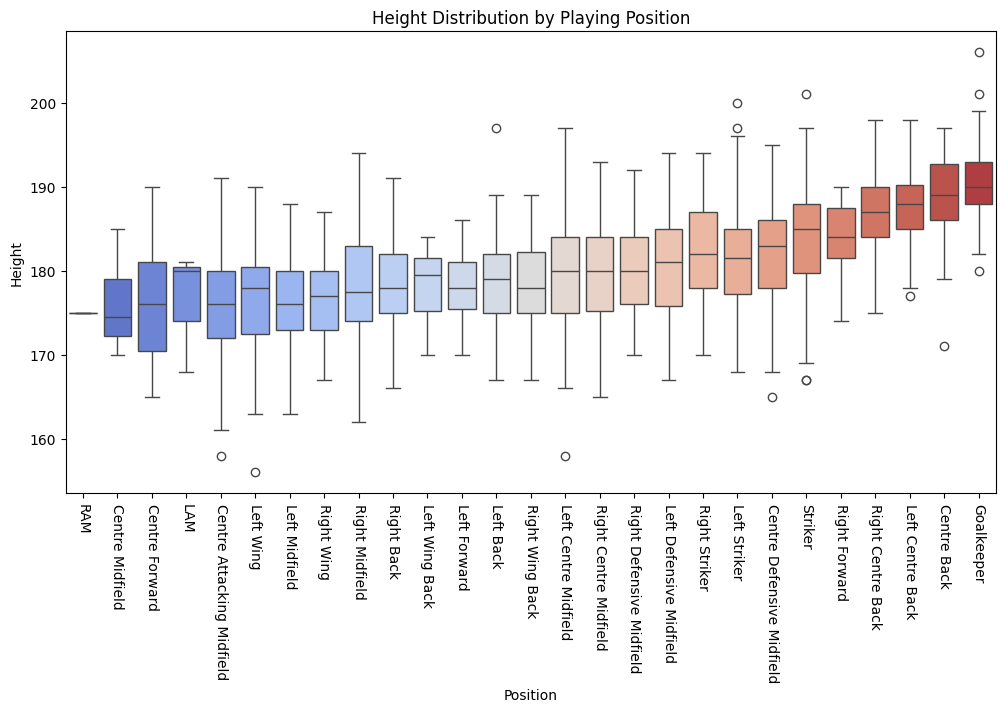

In [27]:


# Mean height per position (after filtering)
mean_height = df_filtered.groupby("Position")["Height"].mean().sort_values()


plt.figure(figsize=(12,6))
sns.boxplot(data=df_filtered, x="Position", y="Height", order=mean_height.index,palette="coolwarm")
plt.xticks(rotation=270)
plt.title("Height Distribution by Playing Position")
plt.show()

In [23]:
cb_height = df_filtered[df_filtered["Position"] == "Centre Back"]["Height"]
other_height = df_filtered[df_filtered["Position"] != "Centre Back"]["Height"]

mean_cb = cb_height.mean()
mean_other = other_height.mean()


pooled_std = np.sqrt(
(cb_height.var() + other_height.var()) / 2
)


cohens_d = (mean_cb - mean_other) / pooled_std


results = {
"Centre Back Mean Height (cm)": round(mean_cb, 2),
"Other Positions Mean Height (cm)": round(mean_other, 2),
"Mean Difference (cm)": round(mean_cb - mean_other, 2),

}


for k, v in results.items():
    print(f"{k}: {v}")
    
print(
f"Centre Backs (M = {mean_cb:.2f} cm, "
f"SD = {cb_height.std():.2f}) were significantly taller than players in other "
f"positions (M = {mean_other:.2f} cm, SD = {other_height.std():.2f}), "
)

Centre Back Mean Height (cm): 188.7
Other Positions Mean Height (cm): 181.62
Mean Difference (cm): 7.08
Centre Backs (M = 188.70 cm, SD = 4.66) were significantly taller than players in other positions (M = 181.62 cm, SD = 7.05), 


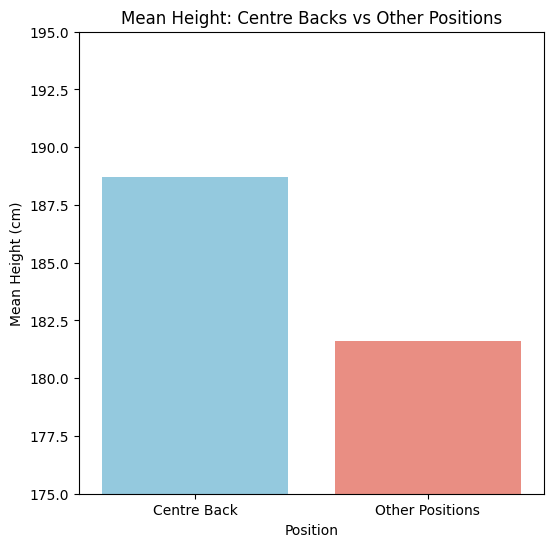

In [24]:
# Create a small dataframe for plotting
mean_df = pd.DataFrame({
"Position": ["Centre Back", "Other Positions"],
"Mean_Height": [mean_cb,mean_other]
})

plt.figure(figsize=(6,6))
sns.barplot(x="Position", y="Mean_Height", data=mean_df, palette=["skyblue", "salmon"])
plt.ylim(175, 195) # optional: to focus the y-axis on relevant heights
plt.ylabel("Mean Height (cm)")
plt.title("Mean Height: Centre Backs vs Other Positions")
plt.show()

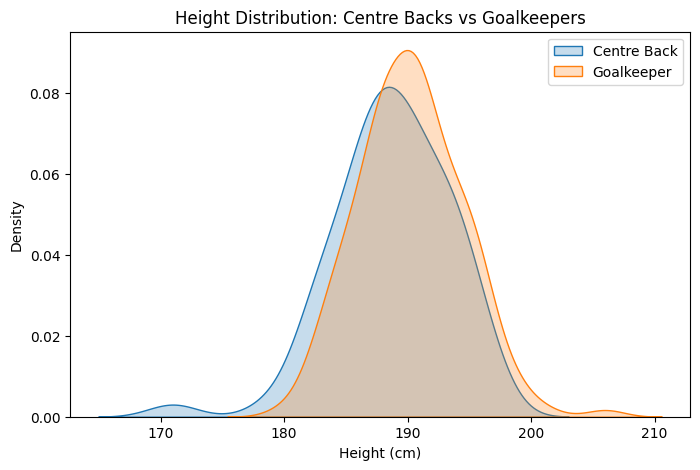

In [25]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["Position"]=="Centre Back"]["Height"], label="Centre Back", fill=True)
sns.kdeplot(df[df["Position"]=="Goalkeeper"]["Height"], label="Goalkeeper", fill=True)
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.title("Height Distribution: Centre Backs vs Goalkeepers")
plt.legend()
plt.show()